In [1]:
from preprocess.kepler_io import *
from utils.functions import *
from utils.fold import *
from utils.bin import *
import matplotlib.pyplot as plt 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import os
plt.tight_layout()

import sys
sys.path.append('C:/Users/User/python_tools')

import lightkurve
from scipy.interpolate import interp1d

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
csv_filename = f"C:/Users/User/dev/data/{csv_name}"
csv_clean = 'C:/Users/User/dev/data/q1_q17_dr24_tce_clean.csv'
img_dir = "C:/Users/User/Desktop/images"

In [4]:
df = pd.read_csv(csv_filename, comment='#')
df.head()

,kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,tce_duration_err,tce_depth,tce_depth_err,tce_model_snr,tce_prad,tce_prad_err,tce_eqt,tce_eqt_err,tce_insol,tce_insol_err,tce_steff,tce_steff_err,tce_slogg,tce_slogg_err,tce_sradius,tce_sradius_err,av_training_set
0,1162345,2,NaN,0.831850,0.000067,132.227,0.035197,0.92600,1.471,2.392,21.0000,6.092,2.636,2.950,0.5099,0.7944,2760.0,637.0,NaN,NaN,6510.0,207.0,4.07,0.26,1.728,0.791,AFP
1,1292087,2,NaN,1.095240,0.000010,132.133,0.002685,0.25630,13.310,2.122,0.4755,34.530,4.427,10.600,0.8916,0.6361,2310.0,661.0,NaN,NaN,6328.0,207.0,4.15,0.29,1.502,0.852,UNK
2,1293031,2,NaN,0.719273,0.000014,132.227,0.002786,0.70000,1.103,1.521,0.3183,29.680,5.248,8.302,1.4550,0.4296,3330.0,703.0,NaN,NaN,6363.0,214.0,3.80,0.35,2.489,1.036,UNK
3,1162345,3,NaN,0.831833,0.000009,131.919,0.002209,0.09536,51.770,2.181,1.2110,27.100,3.550,11.950,0.9062,0.8488,2760.0,637.0,NaN,NaN,6510.0,207.0,4.07,0.26,1.728,0.791,AFP
4,1164109,1,NaN,622.408000,0.008547,162.256,0.009840,0.00319,2193.000,12.010,1.8430,161.300,59.080,3.719,2.1140,2.5990,302.0,75.0,NaN,NaN,6609.0,200.0,4.11,0.28,1.654,0.816,UNK


In [5]:
kepids = get_kepler_ids_from_csv()

Text(0, 0.5, 'Normalized Flux')

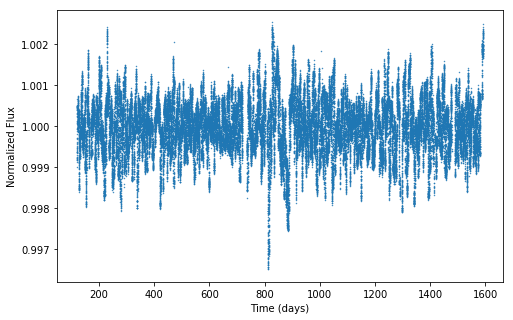

In [6]:
time, flux = get_time_flux_by_ID(1164109)
plt.figure(figsize=(8, 5))
plt.plot(time, flux, '.', ms=0.9)
plt.xlabel('Time (days)')
plt.ylabel('Normalized Flux')
# plt.savefig(os.path.join(img_dir,'1164109_time_flux.png'), dpi=200)

In [7]:
df[df['kepid']==1164109]

,kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,tce_duration_err,tce_depth,tce_depth_err,tce_model_snr,tce_prad,tce_prad_err,tce_eqt,tce_eqt_err,tce_insol,tce_insol_err,tce_steff,tce_steff_err,tce_slogg,tce_slogg_err,tce_sradius,tce_sradius_err,av_training_set
4,1164109,1,NaN,622.408,0.008547,162.256,0.00984,0.00319,2193.0,12.01,1.843,161.3,59.08,3.719,2.114,2.599,302.0,75.0,NaN,NaN,6609.0,200.0,4.11,0.28,1.654,0.816,UNK


In [8]:
kepid = 1164109 
# kepid = 11442793

In [9]:
while True:
    kepid = get_PC_IDs()[0]
    d = get_period_by_IDs(kepid)
    if len(d[kepid]) > 1:
        print(kepid)
        break

004645174


In [10]:
get_period_by_IDs('009347899')

{'009347899': [('1', 20.8602), ('1', 42.6342), ('1', 87.6475), ('1', 9.6173)]}

In [11]:
df[df['kepid']==1164109]

,kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,tce_duration_err,tce_depth,tce_depth_err,tce_model_snr,tce_prad,tce_prad_err,tce_eqt,tce_eqt_err,tce_insol,tce_insol_err,tce_steff,tce_steff_err,tce_slogg,tce_slogg_err,tce_sradius,tce_sradius_err,av_training_set
4,1164109,1,NaN,622.408,0.008547,162.256,0.00984,0.00319,2193.0,12.01,1.843,161.3,59.08,3.719,2.114,2.599,302.0,75.0,NaN,NaN,6609.0,200.0,4.11,0.28,1.654,0.816,UNK


In [12]:
time, flux = get_time_flux_by_ID(1164109)

In [13]:
t, f = flatten_interp_transits(time, flux, 622.408 , 162.256, 12.01/24)

Text(0, 0.5, 'Normalized Flux')

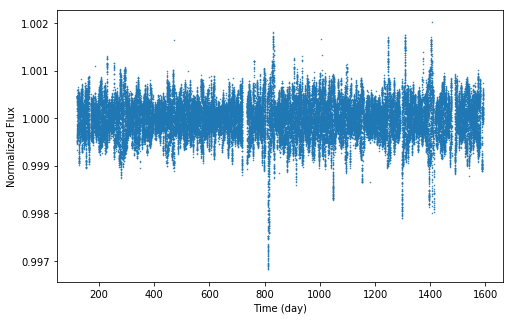

In [14]:
plt.figure(figsize=(8,5))
plt.plot(t, f, '.', ms=1.0)
plt.xlabel('Time (day)')
plt.ylabel('Normalized Flux')
# plt.savefig(os.path.join(img_dir, 'flattened_1164109.png'), dpi=200)

Text(0, 0.5, 'Normalized Flux')

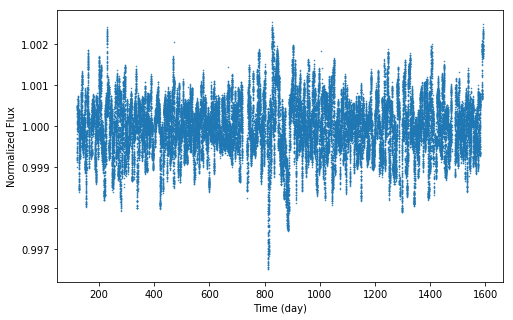

In [15]:
plt.figure(figsize=(8,5))
plt.plot(time, flux, '.', ms=1.0)
plt.xlabel('Time (day)')
plt.ylabel('Normalized Flux')
# plt.savefig(os.path.join(img_dir, 'original__1164109.png'), dpi=200)

In [16]:
fold_t, fold_f = fold(t, f, period=622.408 , t0=162.256)

In [17]:
fold_t, t

(array([5.12753609e-03, 7.46897130e-03, 2.55604072e-02, ...,
        6.22374600e+02, 6.22392695e+02, 6.22395034e+02]),
 array([ 120.53926378,  120.55969844,  120.58013299, ..., 1590.96059183,
        1590.98102638, 1591.00146113]))

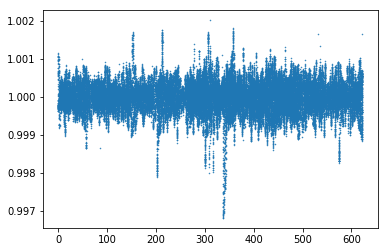

In [18]:
plt.plot(fold_t, fold_f, '.', ms=1.0)

In [19]:
len(fold_t)

65264

In [20]:
b = median_bin(fold_t, fold_f, 2048, normalize=1, bin_width_factor=1)

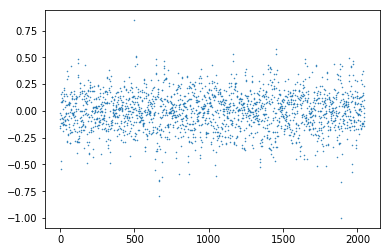

In [21]:
plt.plot(b, '.', ms=1.0)

In [22]:
temp = another_bin(fold_t, fold_f, 2048,  12.01/24)

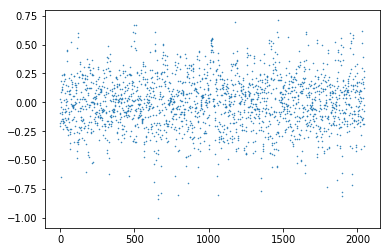

In [23]:
plt.plot(temp, '.', ms=1.0)

In [24]:
pc, _ = get_binned_normalized_flux_by_IDs('009347899', overwrite=1)

write: 009347899
get 009347899
 100.00%

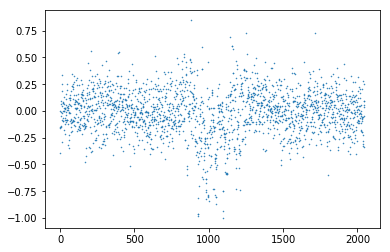

In [25]:
plt.plot(pc[3].ravel(), '.', ms=1.0)

In [26]:
from plots import plot1d

In [68]:
pc =get_binned_normalized_PC_flux(num=9, overwrite=True, shuffle=0)

write: 002449431
 11.11%write: 006062088
 22.22%write: 006922244
 33.33%write: 007503885
 44.44%write: 008151055
 55.56%write: 009166862
 66.67%write: 009412623
 77.78%write: 010166274
 88.89%write: 010330115
 100.00%

In [70]:
non = get_binned_normalized_Non_PC_flux(num=9, overwrite=True, shuffle=True)

shuffle used
write: 008056337
 11.11%write: 009110346
 22.22%write: 008396309
 33.33%write: 003119256
 44.44%write: 002438490
 55.56%write: 006758917
 66.67%write: 007624753
 77.78%write: 006207535
 88.89%write: 009821151
 100.00%

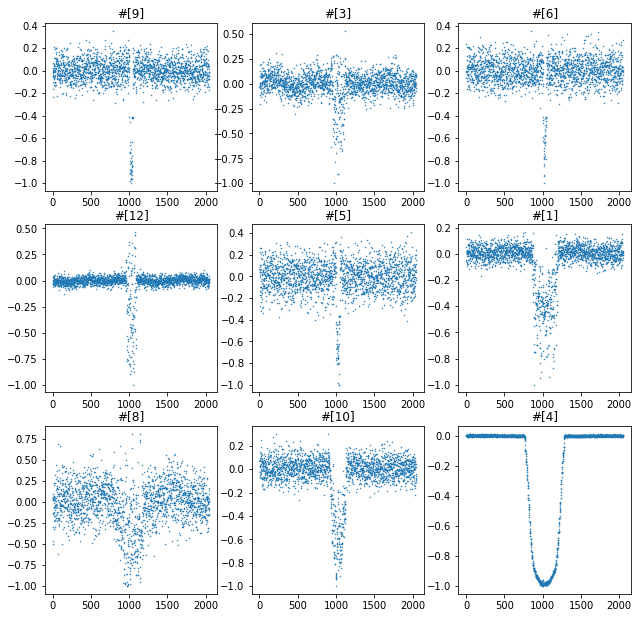

In [69]:
plot1d(pc, 3,3)

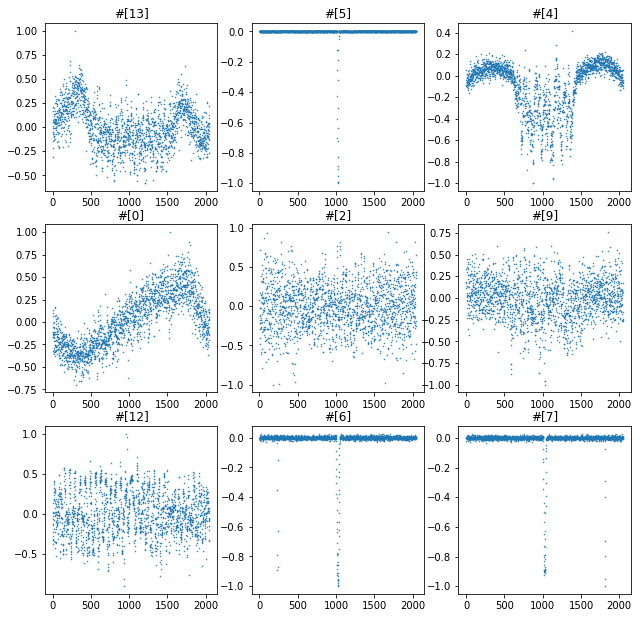

In [67]:
plot1d(non, 3,3)

In [57]:
pc.shape

(4, 2048)

In [174]:
test = pc[3]

In [179]:
get_summary_by_IDs('009347899')

period [('1', 20.8602), ('1', 42.6342), ('1', 87.6475), ('1', 9.6173)]
duration [('1', 0.21941666666666668), ('1', 0.2602083333333333), ('1', 0.36104166666666665), ('1', 0.16375)]
first_epoch [('1', 138.296), ('1', 141.175), ('1', 134.94299999999998), ('1', 132.859)]


In [5]:
data_dir = 'C:/Users/User/dev/data/train/flux'

In [1]:
from clean_utils.io import * 
from models.new_model import ResnetBuilder

Using TensorFlow backend.


In [13]:
m = ResnetBuilder.build_resnet_50((2048, 1), 2)

In [14]:
m.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
pc = np.loadtxt(os.path.join(data_dir, 'all_PCs_flux.txt'))
non = np.loadtxt(os.path.join(data_dir, 'all_Non_PCs_flux.txt'))
pc.shape, non.shape

((299, 2048), (695, 2048))

In [7]:
x = np.concatenate([pc, non])
y = [1]*len(pc) + [0]*len(non)

In [15]:
m.fit(x.reshape(*x.shape, 1), y, epochs=50, validation_split=0.1)

Train on 894 samples, validate on 100 samples
Epoch 1/50
894/894 [==============================] - 35s 39ms/step - loss: 5.7879 - acc: 0.7081 - val_loss: 5.0448 - val_acc: 0.8700
Epoch 2/50
894/894 [==============================] - 9s 10ms/step - loss: 4.9188 - acc: 0.7763 - val_loss: 4.5890 - val_acc: 0.7000
Epoch 3/50
894/894 [==============================] - 9s 10ms/step - loss: 4.2546 - acc: 0.7796 - val_loss: 3.9587 - val_acc: 0.7200
Epoch 4/50
894/894 [==============================] - 9s 10ms/step - loss: 3.6633 - acc: 0.7841 - val_loss: 3.3122 - val_acc: 0.8300
Epoch 5/50
894/894 [==============================] - 9s 10ms/step - loss: 3.1780 - acc: 0.8009 - val_loss: 2.8564 - val_acc: 0.8200
Epoch 6/50
894/894 [==============================] - 9s 10ms/step - loss: 2.7946 - acc: 0.8031 - val_loss: 2.8573 - val_acc: 0.6500
Epoch 7/50
894/894 [==============================] - 9s 10ms/step - loss: 2.4624 - acc: 0.8098 - val_loss: 2.2062 - val_acc: 0.8400
Epoch 8/50
894/894 [==